In [15]:
import os, string
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory="D:\Trainingsmails_Anonym"
tree=os.listdir(directory)


In [3]:
tree

['Amazon - diverse',
 'Angebote-Werbung-Newsletter',
 'Bestellbest┬Дaetigungen',
 'Kino',
 'Mietwagen',
 'Rechnungen',
 'Reisen',
 'Retoure',
 'Veranstaltungen',
 'Versandbestae┬Дtigung',
 'Zahlungseingang']

In [ ]:
for i in os.walk(directory):
    print (i[0])
    print ("has {} folders".format(len(i[1])))
    print ("has {} files".format(len(i[2])))
    print("______")

In [4]:
NEWLINE="\n"

In [5]:
def to_base(directory):
    base=pd.DataFrame(columns=["Text", "Label"])
    for address,_,files in os.walk(directory):
        for file in files:
            if not file.endswith(".eml"):
                continue
            path=os.path.join(address,file)
            
            with open (path, "r", errors='ignore', encoding="utf-8") as f:
                passed_header, lines=False, []
                for line in f:
                    if line.startswith("From:"):
                        lines.append(line.replace("From: ", "").lower())
                    if line.startswith("Subject:"):
                        lines.append(line.replace("Subject: ", "").lower())
                    if passed_header:
                        lines.append(line.lower())
                    elif line==NEWLINE:
                        passed_header=True
            content=NEWLINE.join(lines)            
            label=address.split("\\")[-1]
            row=pd.DataFrame({"Text":[content], "Label": [label]})
            base=base.append(row, ignore_index=True)
    return base
        

In [6]:
data=to_base(directory)

In [7]:
data.head()

,Text,Label
0,"amazon.de <promotion5@amazon.de>\n\n""hund hünd...",Amazon - diverse
1,"amazon.de <promotion5@amazon.de>\n\n""milestone...",Amazon - diverse
2,amazon.de <promotion5@amazon.de>\n\namazon.de ...,Amazon - diverse
3,amazon.de <promotion5@amazon.de>\n\namazon.de ...,Amazon - diverse
4,amazon.de <promotion5@amazon.de>\n\namazon.de ...,Amazon - diverse


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
X=data["Text"]
y=data["Label"]

In [10]:
d={}
for i in range(0, y.unique().shape[0]):
    d[y.unique()[i]]=i

In [11]:
d

{'Amazon - diverse': 0,
 'Angebote-Werbung-Newsletter': 1,
 'Bestellbest┬Дaetigungen': 2,
 'Amazon': 3,
 'Kino': 4,
 'Mietwagen': 5,
 'Rechnungen': 6,
 'Reisen': 7,
 'Retoure': 8,
 'Veranstaltungen': 9,
 'Versandbestae┬Дtigung': 10,
 'DHL': 11,
 'DPD': 12,
 'GLS': 13,
 'UPS': 14,
 'Zahlungseingang': 15}

In [12]:
y1=y.map(d)
data["Label_coded"]=y1


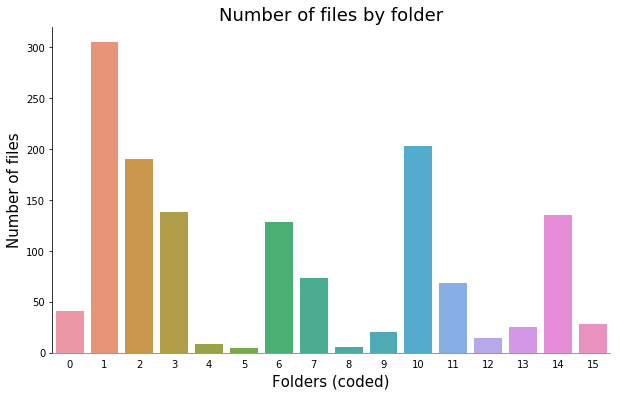

In [16]:
plt.figure(figsize=(10,6))
plt.title("Number of files by folder", fontsize=18)
plt.rcParams['axes.labelsize']="x-large"
sns.countplot(x="Label_coded",  data=data)
plt.xlabel("Folders (coded)", fontsize=15)
plt.ylabel("Number of files", fontsize=15)
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color("gray")


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_score, train_test_split
from sklearn import metrics


In [ ]:
"""Alir3z4/python-stop-words  https://github.com/Alir3z4/python-stop-words"""
#from stop_words import get_stop_words
#from stop_words import safe_get_stop_words
#stop_words = safe_get_stop_words('unsupported language')
#stop_words = get_stop_words('german')
#print(stop_words[:10])

In [17]:
from nltk.corpus import stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']


In [18]:
from nltk.stem.snowball import SnowballStemmer
from nltk import tokenize, FreqDist
stemmer = SnowballStemmer("german")
X_processed=[]
for row in X:
    words=tokenize.word_tokenize(row)
    for i in range(0, len(words)):
        words[i]=stemmer.stem(words[i])
    X_processed.append(" ".join(words))

In [75]:
stop_words=stopwords.words('german')
type(stop_words)
stop_words.append("https")
stop_words.append("www")


In [76]:
vectorizer=CountVectorizer(stop_words=stop_words)

In [77]:
X_vect=vectorizer.fit_transform(i for i in X_processed)

In [78]:
X_vect.shape

(1390, 43502)

In [79]:
tft=TfidfTransformer(use_idf=False)
X_vect_norm=tft.fit_transform(X_vect)

In [ ]:
vect1=CountVectorizer()
X_v=vect1.fit_transform(X)
X_v.shape

In [ ]:

words=tokenize.word_tokenize(X[5])

In [ ]:
len(words)

In [ ]:
freq1=FreqDist(words)

In [ ]:
len(freq1.keys())

In [ ]:
words_stemmed=[stemmer.stem(i) for i in words]


In [ ]:
freq2=FreqDist(words_stemmed)
len(freq2.keys())

In [ ]:
words_clean=[]
for w in words_stemmed:
    if not w in stop_words:
        words_clean.append(w)
freq3=FreqDist(words_clean)
len(freq3)

In [ ]:
freq3

In [ ]:
words_nopunkt = [w for w in words_clean if w.isalpha()]
freq4=FreqDist(words_nopunkt)
len(freq4)

In [ ]:
freq4

In [80]:
import random
random.seed(42)
X_train, X_test, y_train, y_test=train_test_split(X_vect_norm, y1, test_size=0.2, stratify=y1, shuffle=True, random_state=12)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [38]:

lr=LogisticRegression(random_state=12)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
f1_scorer=metrics.make_scorer(metrics.f1_score, average="weighted" )
cvs=cross_val_score(lr, X_train, y_train, scoring=f1_scorer, 
                    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2))

In [40]:
cvs.mean()

0.8848333221602644

In [ ]:
metrics.accuracy_score(y_test, lr.predict(X_test))

In [60]:
from sklearn.metrics import confusion_matrix
import itertools

In [61]:

cm1=confusion_matrix(lrm.predict(X_test), y_test)

In [62]:
def plot_confusion_matrix(cm1, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm1)

    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(aspect=5)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm1.max() / 2.
    for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
        plt.text(j, i, format(cm1[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm1[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization


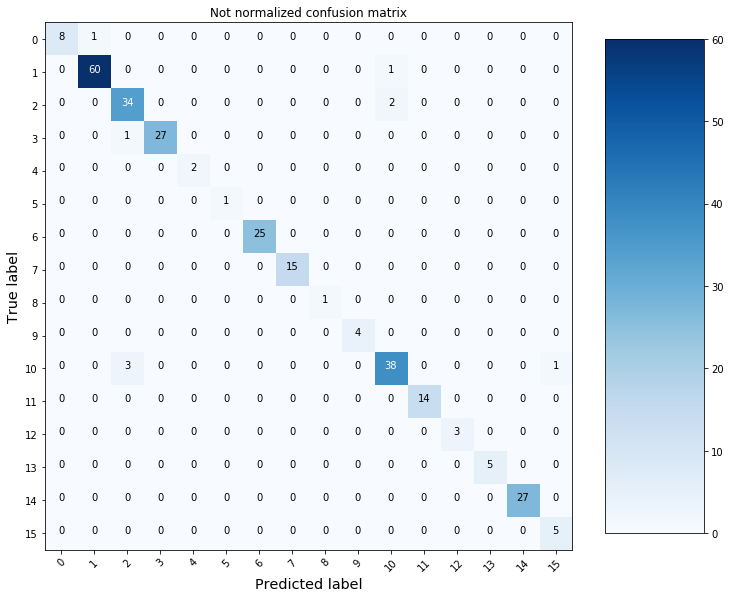

In [63]:
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm1, classes=d.values(), normalize=False,
                      title='Not normalized confusion matrix')

plt.show()

Normalized confusion matrix


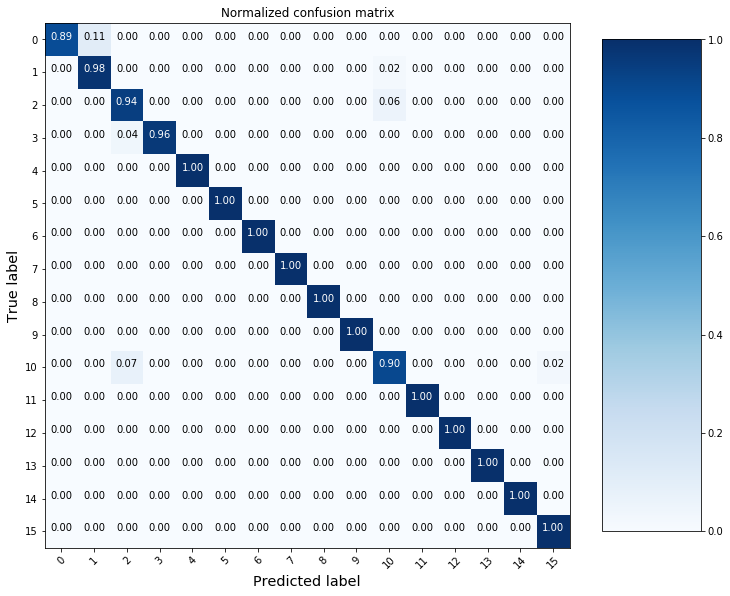

In [64]:
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm1, classes=d.values(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(lr.predict(X_test), y_test))

In [81]:
sm=SMOTE(k_neighbors=3)
X_train_res, y_train_res=sm.fit_sample(X_train, y_train)

In [ ]:
lr1=LogisticRegression(random_state=12)
lr1.fit(X_train_res, y_train_res)

In [ ]:
Counter(y_train_res).items()

In [ ]:
print(classification_report(lr1.predict(X_test), y_test, digits=3))

In [ ]:

metrics.accuracy_score(lr1.predict(X_test), np.array(y_test))

In [ ]:
cvs1=cross_val_score(lr1, X_train_res, y_train_res, scoring=f1_scorer, 
                    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2))

In [ ]:
cvs1.mean()

In [ ]:
from imblearn.over_sampling import ADASYN


In [ ]:
adasyn=ADASYN(n_neighbors=3)

In [ ]:
X_train_res_a, y_train_res_a=sm.fit_sample(X_train, y_train)
lr2=LogisticRegression(random_state=12)
lr2.fit(X_train_res_a, y_train_res_a)
cvs2=cross_val_score(lr2, X_train_res_a, y_train_res_a, scoring=f1_scorer, 
                    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2))

In [ ]:
cvs2.mean()

In [ ]:
print(classification_report(lr2.predict(X_test), y_test))

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [ ]:
svd=TruncatedSVD(random_state=12)
truncated_data=svd.fit_transform(X_vect)

In [ ]:

import matplotlib.cm as cm
y_=pd.DataFrame(y1)
plt.figure(figsize=(10,6))
colors = cm.rainbow(np.linspace(0, 1, len(set(y1))))
for yy, c in zip(set(y1), colors):
    plt.scatter(truncated_data[y_[y_.values==yy].index.values, 0], 
                truncated_data[y_[y_.values==yy].index.values, 1], c=c, alpha=0.8, label=str(yy))
plt.legend()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
random.seed(12)
classifiers={RandomForestClassifier(random_state=12),
             KNeighborsClassifier(),
             SVC(random_state=12),
             LogisticRegression(random_state=12, multi_class="multinomial", C=2, solver="lbfgs"),
             MultinomialNB()
             }


In [ ]:
random.seed(42)
result=pd.DataFrame(columns=["Classifier",  "F1"])
for clf in classifiers:
    cv=cross_val_score(clf, X_train, y_train, cv=StratifiedShuffleSplit(test_size=0.3), scoring=f1_scorer, n_jobs=-1)
    entry=pd.DataFrame([[clf.__class__.__name__,  cv.mean()]],
                           columns=["Classifier",  "F1"])
   
    result=result.append(entry, ignore_index=True)
result=result.sort_values("F1", ascending=False).reset_index(drop=True)
result

In [ ]:
random.seed(42)
result_SMOTE=pd.DataFrame(columns=["Classifier",  "F1"])
for clf in classifiers:
    clf.fit(X_train_res, y_train_res)
    entry=pd.DataFrame([[clf.__class__.__name__,  metrics.f1_score(y_test, clf.predict(X_test), average="weighted")]],
                           columns=["Classifier",  "F1"])
   
    result_SMOTE=result_SMOTE.append(entry, ignore_index=True)
result_SMOTE=result_SMOTE.sort_values("F1", ascending=False).reset_index(drop=True)
result_SMOTE

In [ ]:
random.seed(42)
result_ADASYN=pd.DataFrame(columns=["Classifier",  "F1"])
for clf in classifiers:
    clf.fit(X_train_res, y_train_res)
    entry=pd.DataFrame([[clf.__class__.__name__,  metrics.f1_score(y_test, clf.predict(X_test), average="weighted")]],
                           columns=["Classifier",  "F1"])
   
    result_ADASYN=result_ADASYN.append(entry, ignore_index=True)
result_ADASYN=result_ADASYN.sort_values("F1", ascending=False).reset_index(drop=True)
result_ADASYN

In [ ]:
sns.barplot(data=result_SMOTE, y="Classifier", x="F1", orient="h" )
plt.title("Classifiers performance based on F1-score")
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')
plt.xlim(0,1)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color("black")

In [ ]:
vectorizer.vocabulary_.value(423)

In [ ]:
inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}

In [82]:
from sklearn.model_selection import GridSearchCV
lrm=LogisticRegression(multi_class="multinomial", C=2, solver="lbfgs")
lrm.fit(X_train_res, y_train_res)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
params={"C": [0.1, 0.5, 1, 2],
        "multi_class": ["ovr", "multinomial"],
        "solver": ["lbfgs"]
         
}
grid=GridSearchCV(LogisticRegression(), param_grid=params, cv=StratifiedShuffleSplit(n_splits=5), 
                  scoring=f1_scorer, n_jobs=-1, return_train_score=False)
grid.fit(X_train, y_train)

In [ ]:
lrm.get_params().keys()

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [83]:
print(classification_report(lrm.predict(X_test), y_test, digits=3))

             precision    recall  f1-score   support

          0      1.000     0.800     0.889        10
          1      0.984     0.984     0.984        61
          2      0.895     0.944     0.919        36
          3      1.000     0.964     0.982        28
          4      1.000     1.000     1.000         2
          5      1.000     1.000     1.000         1
          6      1.000     1.000     1.000        25
          7      1.000     1.000     1.000        15
          8      1.000     1.000     1.000         1
          9      1.000     1.000     1.000         4
         10      0.902     0.902     0.902        41
         11      1.000     1.000     1.000        14
         12      1.000     1.000     1.000         3
         13      1.000     1.000     1.000         5
         14      1.000     1.000     1.000        27
         15      0.833     1.000     0.909         5

avg / total      0.965     0.964     0.964       278



In [46]:
metrics.accuracy_score(lrm.predict(X_test), y_test)

0.9676258992805755

In [57]:
feature_names = np.asarray(vectorizer.get_feature_names())
for i, label in enumerate(d.keys()):
    top10 = np.argsort(lrm.coef_[i])[-10:]
    print("Label:{}. Keywords: {}".format(label, " ".join(feature_names[top10])))

Label:Amazon - diverse. Keywords: luxemburg unlimited buch all http artikel erstatt kindl preis amazon
Label:Angebote-Werbung-Newsletter. Keywords: ab ref http gp notebooksbilliger 2017 nl euro newslett de
Label:Bestellbest┬Дaetigungen. Keywords: widerrufsrecht liefer postleitzahl sach dank strass network bestellbestat playstation bestell
Label:Amazon. Keywords: uber mocht bitt westfal nordrhein sendung besuch eur amazon bestell
Label:Kino. Keywords: kinopolis 15 kart reservierungsnumm sitzplatz kino reserviert buchungsbestat platz cineplex
Label:Mietwagen. Keywords: 66 reservier 00 fahr dt eur 44 25 bonn sixt
Label:Rechnungen. Keywords: pdf online foodora tomtom gesamt mwst 2017 19 nr rechnung
Label:Reisen. Keywords: bahn com nachnam unterkunft tripadvisor fur travel reis hotel buchung
Label:Retoure. Keywords: 38 rucksend link amazon uber 95 mytoys retour retourensend zalando
Label:Veranstaltungen. Keywords: 10 comedy 05 html 14 go ab service ticket eventim
Label:Versandbestae┬Дtigung